In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
import numpy as np
import math
from math import exp

def reliability(vec, lamb):
    return [exp(-lamb * x) for x in vec]

def unreliability(vec, lamb):
    return [1 - exp(-lamb * x) for x in vec]

def MTTF_hypo(vec):
    x = 0;
    for i in range(len(vec)):
        x += 1/vec[i]
    return x

def TMR (vec):
    return [(3 * (x**2)) - (2 * (x ** 3)) for x in vec]

def TMR_simplex (vec):
    return [(3/2 * (x)) - (1/2 * (x ** 3)) for x in vec]

def comb(n, k):
    f = math.factorial
    return f(n)/(f(k)*f(n-k))

def NMR_calc (x, n):
    result = 0
    for i in range((math.floor(n/2))+1, n+1):
        result += (comb(n, i)*(x ** i)*((1-x)**(n-i)))
    return result


def NMR(vec, n):
    return [NMR_calc(x, n) for x in vec]

def parallel_calc (x, n):
    result = 0
    for i in range(1, n+1):
        result += (comb(n, i)*(x ** i)*((1-x)**(n-i)))
    return result

def parallel(vec, n):
    return [parallel_calc(x, n) for x in vec]

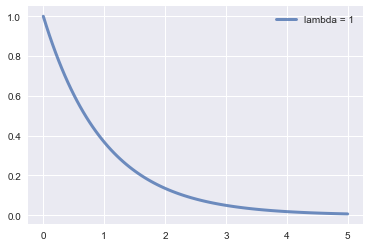

In [2]:
# load the seaborn configurations
sns.set()

x = np.linspace(0, 5, 100)

blue_line = plt.plot(x, expon.pdf(x, loc=0, scale=1), lw=3, alpha=0.8, label='lambda = 1')

plt.legend(handles=blue_line)

plt.show()

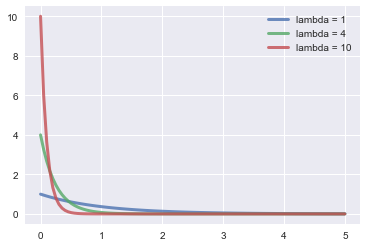

In [3]:
x = np.linspace(0, 5, 100)

y = np.linspace(0, 5, 100)

z = np.linspace(0, 5, 100)

blue_line, = plt.plot(x, expon.pdf(x, loc=0, scale=1), lw=3, alpha=0.8, label='lambda = 1')

green_line, = plt.plot(y, expon.pdf(y, loc=0, scale=1/4), lw=3, alpha=0.8, label='lambda = 4')

red_line, = plt.plot(z, expon.pdf(z, loc=0, scale=1/10), lw=3, alpha=0.8, label='lambda = 10')

plt.legend(handles=[blue_line, green_line, red_line])

plt.show()

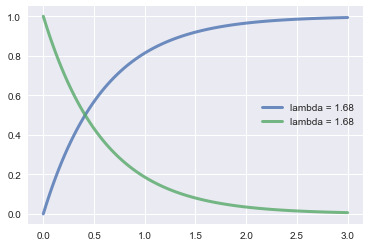

In [4]:
x = np.linspace(0, 3, 100)

y = np.linspace(0, 3, 100)

unreli_x = unreliability(x, 1.68)
reli_y= reliability(y, 1.68)

blue_line, = plt.plot(x, unreli_x, lw=3, alpha=0.8, label='lambda = 1.68')

green_line, = plt.plot(y, reli_y, lw=3, alpha=0.8, label='lambda = 1.68')

plt.legend(handles=[blue_line, green_line])

plt.show()

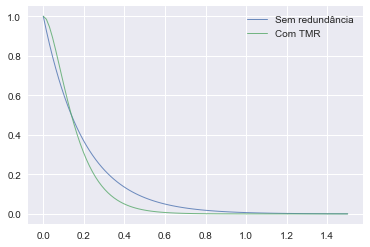

In [5]:
x = np.linspace(0, 1.5, 100)


reli_x= reliability(x, 5)
tmr_x = TMR(reli_x)

blue_line, = plt.plot(x, reli_x, lw=1, alpha=0.8, label='Sem redundância')
green_line, = plt.plot(x, tmr_x, lw=1, alpha=0.8, label='Com TMR')

plt.legend(handles=[blue_line, green_line])

plt.show()

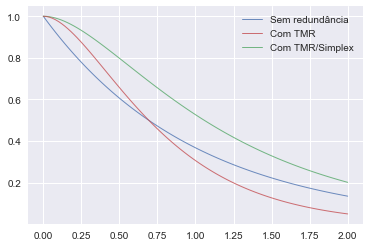

In [6]:
x = np.linspace(0, 2, 100)


reli_x= reliability(x, 1)
tmr_x = TMR(reli_x)
tmr_simp_x = TMR_simplex(reli_x)

blue_line, = plt.plot(x, reli_x, lw=1, alpha=0.8, label='Sem redundância')
green_line, = plt.plot(x, tmr_simp_x, lw=1, alpha=0.8, label='Com TMR/Simplex')
red_line, = plt.plot(x, tmr_x, lw=1, alpha=0.8, label='Com TMR')

plt.legend(handles=[blue_line, red_line, green_line])

plt.show()

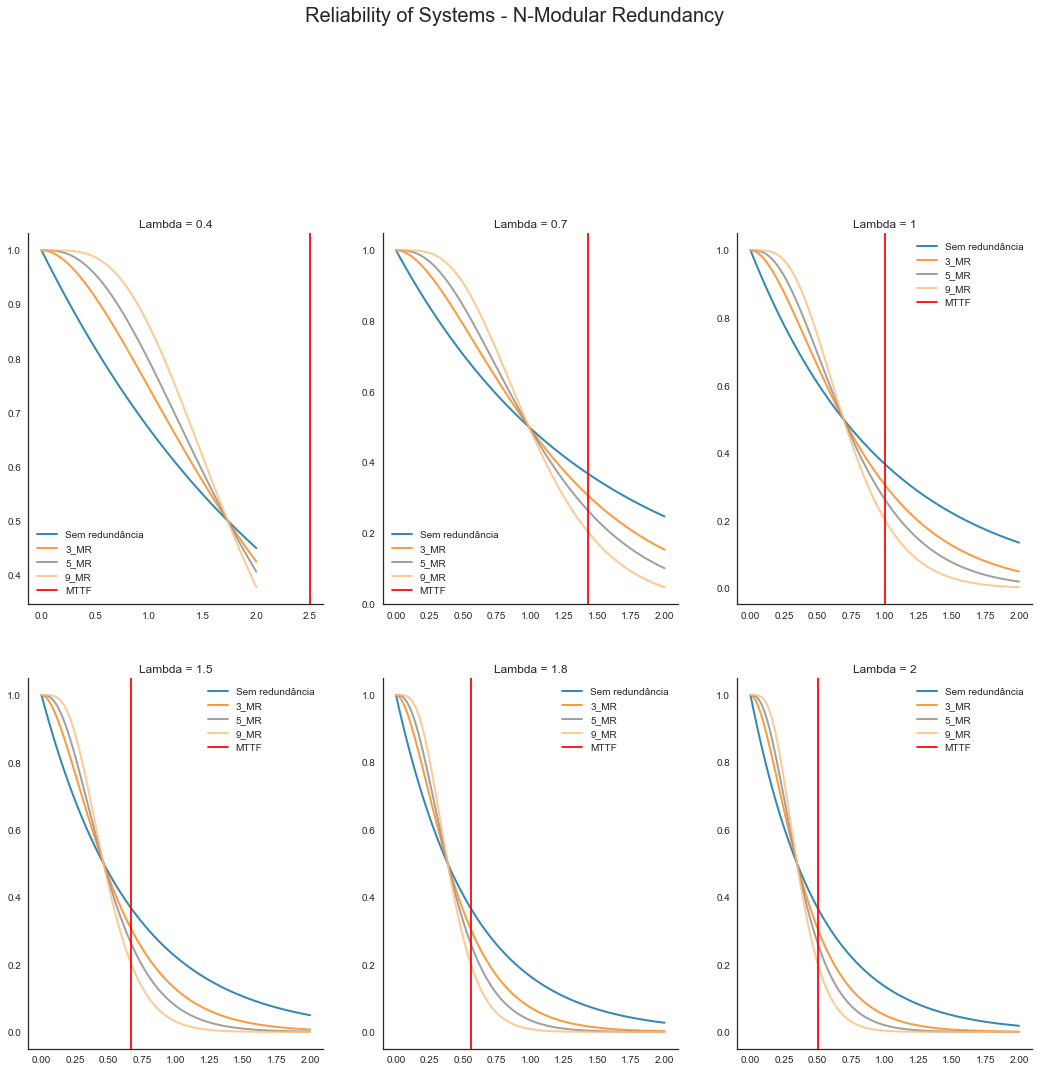

In [60]:
x = np.linspace(0, 2, 100)


lamb_values = [.4, .7,1, 1.5, 1.8, 2]
lamb_titles = ["Lambda = " + str(x) for x in lamb_values]


sns.set_style("white")

fig = plt.subplots(figsize=(18,15))
plt.suptitle("Reliability of Systems - N-Modular Redundancy", 
             fontsize=20,
            y = 1.09)
plt.axis('off')


for i in range(len(lamb_values)):
    reli_x= reliability(x, lamb_values[i])
    um_MR= NMR(reli_x, 1)
    tres_MR = NMR(reli_x, 3)
    cinco_MR = NMR(reli_x, 5)
    nove_MR = NMR(reli_x, 9)
    
    axe = fig[0].add_subplot(2,3,i+1)
    sns.despine(left=False, right=True, bottom=False, top=True)
    axe.set_title(lamb_titles[i]);
    
    plot_1, = axe.plot(x, um_MR, lw=2, alpha=0.8, color=(0/255,107/255,164/255), label='Sem redundância')
    plot_2, = axe.plot(x, tres_MR, lw=2, alpha=0.8, color=(255/255,128/255,14/255), label='3_MR')
    plot_3, = axe.plot(x, cinco_MR, lw=2, alpha=0.8, color=(137/255,137/255,137/255), label='5_MR')
    plot_4, = axe.plot(x, nove_MR, lw=2, alpha=0.8, color=(1,188/255,121/255), label='9_MR')
    plot_5 = axe.axvline(1/lamb_values[i], color='r', label='MTTF')

    plt.legend(handles=[plot_1, plot_2, plot_3, plot_4, plot_5])

plt.show()

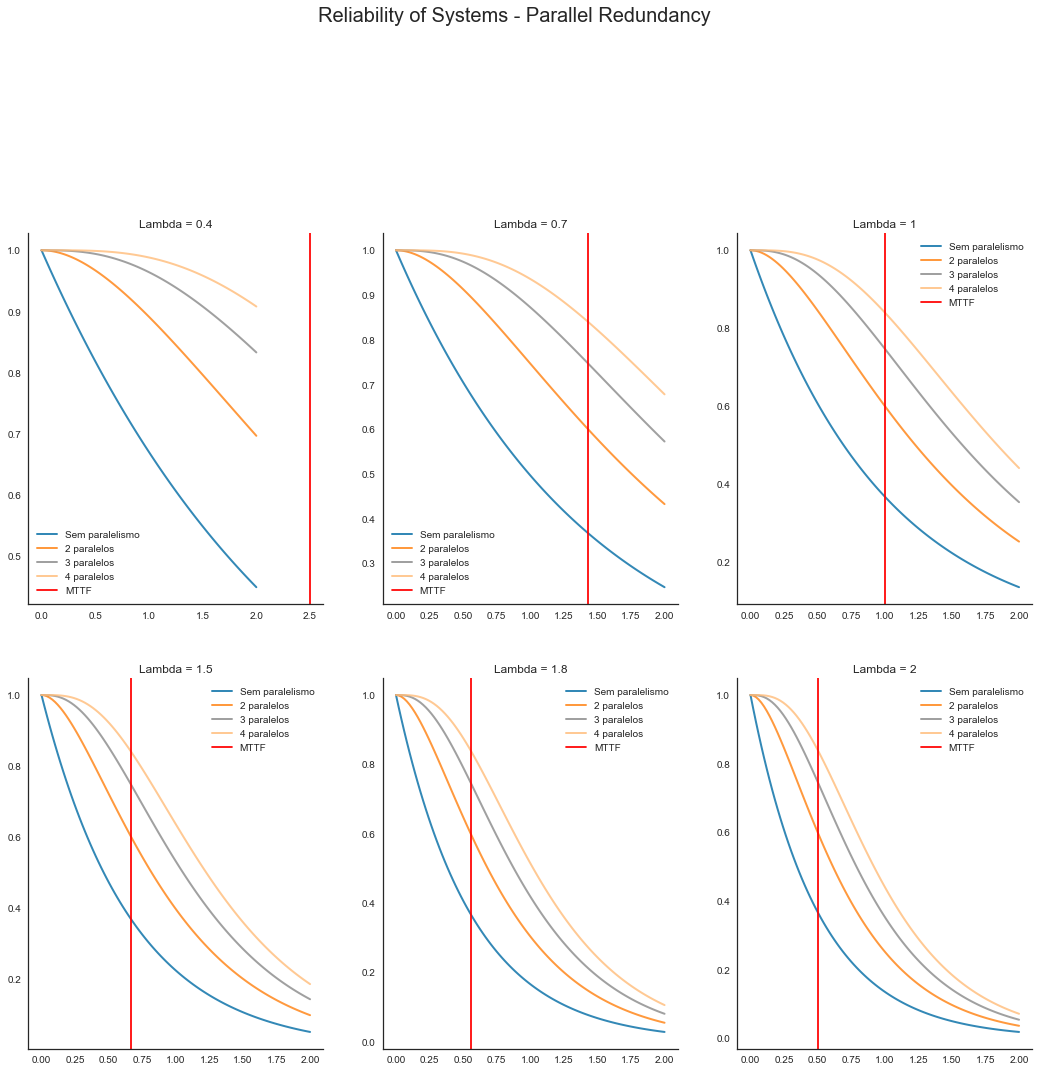

In [64]:
x = np.linspace(0, 2, 100)


lamb_values = [.4, .7,1, 1.5, 1.8, 2]
lamb_titles = ["Lambda = " + str(x) for x in lamb_values]
labels = []

sns.set_style("white")

fig = plt.subplots(figsize=(18,15))
plt.suptitle("Reliability of Systems - Parallel Redundancy", 
             fontsize=20,
            y = 1.09)
plt.axis('off')


for i in range(len(lamb_values)):
    reli_x= reliability(x, lamb_values[i])
    dois_para= parallel(reli_x, 2)
    tres_para = parallel(reli_x, 3)
    quatro_para = parallel(reli_x, 4)

    
    axe = fig[0].add_subplot(2,3,i+1)
    sns.despine(left=False, right=True, bottom=False, top=True)
    axe.set_title(lamb_titles[i]);
    
    plot_1, = axe.plot(x, reli_x, lw=2, alpha=0.8, color=(0/255,107/255,164/255),  label='Sem paralelismo')
    plot_2, = axe.plot(x, dois_para, lw=2, alpha=0.8, color=(255/255,128/255,14/255),  label='2 paralelos')
    plot_3, = axe.plot(x, tres_para, lw=2, alpha=0.8, color=(137/255,137/255,137/255), label='3 paralelos')
    plot_4, = axe.plot(x, quatro_para, lw=2, alpha=0.8, color=(1,188/255,121/255), label='4 paralelos')
    
    plot_5 = axe.axvline(1/lamb_values[i], color='r', label='MTTF')

    plt.legend(handles=[plot_1, plot_2, plot_3, plot_4, plot_5])


plt.show()